### Importing the required libraries for exploratory data analysis

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv("Data/orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


Text(0, 0.5, 'Users')

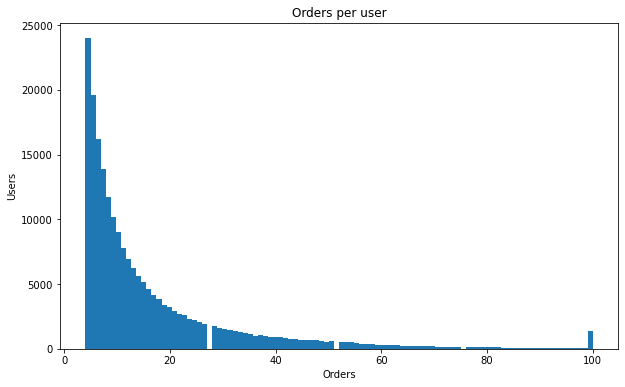

In [5]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.hist(orders.user_id.value_counts(),bins=100)
ax.set_title("Orders per user")
ax.set_xlabel("Orders")
ax.set_ylabel("Users")

As we can tell that most users placing orders <20.

In [6]:
print(f"Mean orders per customer: {orders.user_id.value_counts().mean()}")
print(f"Median orders per customer: {orders.user_id.value_counts().median()}")

Mean orders per customer: 16.590367054784224
Median orders per customer: 10.0


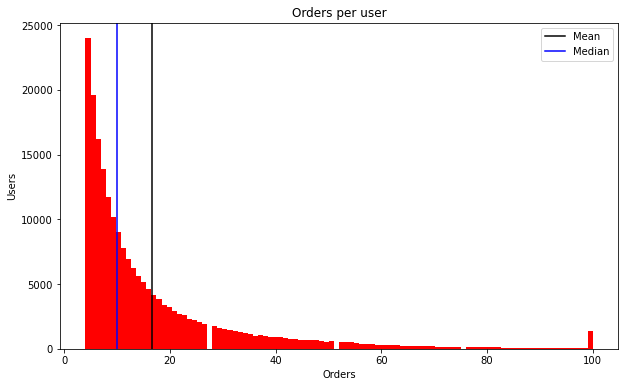

In [7]:
plt.figure(figsize=(10,6))
plt.hist(orders.user_id.value_counts(),bins=100,color="red")
plt.axvline(orders.user_id.value_counts().mean(),color="black",label="Mean")
plt.axvline(orders.user_id.value_counts().median(),color="blue",label="Median")
plt.title("Orders per user")
plt.xlabel("Orders")
plt.ylabel("Users")
plt.legend();

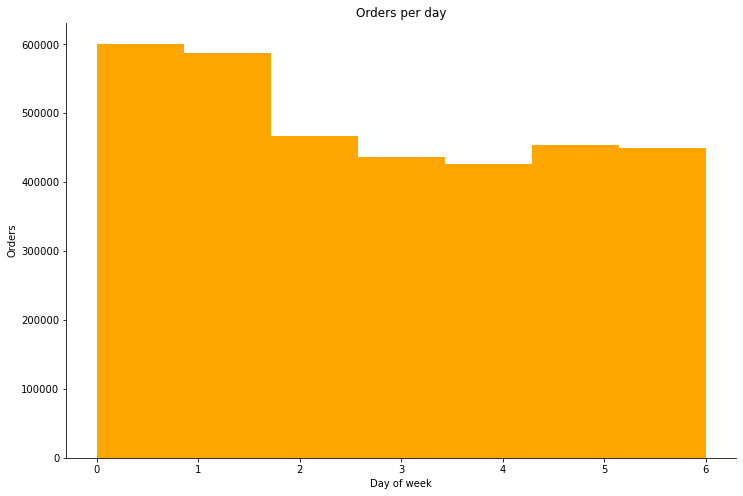

In [46]:
plt.figure(figsize=(12,8))
plt.hist(orders.order_dow,bins=7,color="orange",histtype="bar")
plt.title("Orders per day")
plt.xlabel("Day of week")
plt.ylabel("Orders")
sns.despine()
plt.show();

day0 starts with Sunday and ends with Saturday, Most people have placed their orders on Sunday (pretty predictable).

In [26]:
products = pd.read_csv("Data/products.csv")
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


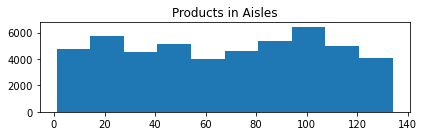

In [30]:
plt.figure(figsize=(6,2))
plt.hist(products.aisle_id)
plt.title("Products in Aisles")
plt.tight_layout();

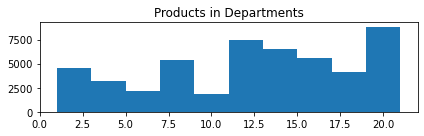

In [31]:
plt.figure(figsize=(6,2))
plt.hist(products.department_id)
plt.title("Products in Departments")
plt.tight_layout();

Most of the products are from Department id 20, which are deli products or ready-to-eat items such as meat cuts,cheese,sandwiches,breads and so on.

In [32]:
aisles = pd.read_csv("Data/aisles.csv")
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [35]:
print(f"Total products on aisles: {len(aisles['aisle'])}")
print(f"No.of unique products on aisles: {len(aisles['aisle'].unique())}")

Total products on aisles: 134
No.of unique products on aisles: 134


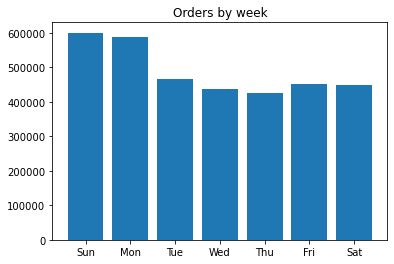

In [37]:
days = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
values = [orders.order_dow.value_counts()[day] for day in days.keys()]
plt.bar(days.values(),values)
plt.title("Orders by week")
plt.show();

In [53]:
departments = pd.read_csv("Data/departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [57]:
order_prod_train = pd.read_csv("Data/order_products__train.csv")
order_prod_prior = pd.read_csv("Data/order_products__prior.csv")
order_prod = pd.concat([order_prod_train,order_prod_prior])
order_products = order_prod.merge(products, on='product_id', how='left').merge(orders, on='order_id', how='left').merge(departments, on='department_id').merge(aisles, on='aisle_id')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,dairy eggs,yogurt
1,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,56463,train,41,3,8,14.0,dairy eggs,yogurt
2,170,8153,6,0,Plain Non-Fat Greek Yogurt,120,16,182389,train,7,0,13,14.0,dairy eggs,yogurt
3,631,9203,13,1,Dairy Free Coconut Milk Raspberry Yogurt Alter...,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt
4,631,15842,14,1,Dairy Free Coconut Milk Yogurt Alternative,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt


*Ratio of reordered products:*
* 58.96% of products in prior orders were re-ordered
* 59.85% of products in train orders were re-order

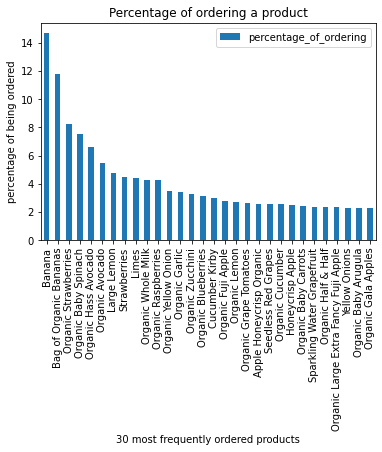

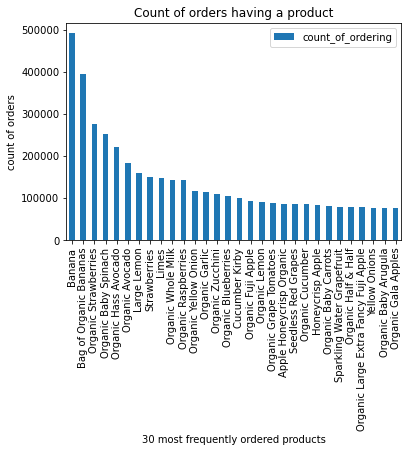

In [60]:
total_orders = order_products['order_id'].nunique()
products_frequency_desc = order_products.groupby('product_name')['order_id'].aggregate('count').reset_index()
products_frequency_desc['count_of_ordering'] =  products_frequency_desc['order_id']
products_frequency_desc = products_frequency_desc.sort_values(by=['count_of_ordering'], ascending=False)

products_frequency_desc['percentage_of_ordering'] = (products_frequency_desc['count_of_ordering']/total_orders) * 100 
products_frequency_desc.iloc[:30].plot.bar(x='product_name', y='percentage_of_ordering')
plt.xlabel('30 most frequently ordered products')
plt.ylabel('percentage of being ordered')
plt.xticks(rotation=90)
plt.title('Percentage of ordering a product')
plt.show()

products_frequency_desc.iloc[:30].plot.bar(x='product_name', y='count_of_ordering')
plt.xlabel('30 most frequently ordered products')
plt.ylabel('count of orders')
plt.xticks(rotation=90)
plt.title('Count of orders having a product')
plt.show()

del products_frequency_desc

*How often a product is the first item purchased:*
> 5 most products added to the cart:

    * Banana
    * Bag of Organic Bananas
    * Organic Strawberries
    * Organic Baby spinach
    * Organic Hass Avocado
* 15>% of the orders are Bananas
* People always go for the "Organic" items the most

#### Purchasing behaviour on Departments:
*Count of products in each department*

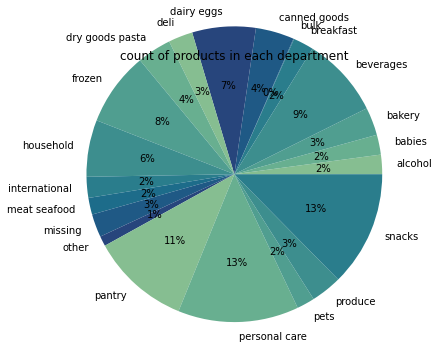

In [66]:
colors = sns.color_palette("crest",8)
prod_dept = products.merge(departments, on='department_id', how='left')
data = prod_dept.groupby(['department']).agg({'product_id':'count'}).reset_index().rename(columns={'product_id':'products_count'})
plt.pie(data['products_count'], labels = data['department'], colors = colors, autopct='%.0f%%', radius=1.7)
plt.title('count of products in each department')
plt.show();